# EMIPredict AI 

## Data Loading and Preprocessing

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset with low_memory=False to handle mixed types
file_path = 'C:\\Users\\Jantoin\\Documents\\EMIPredictAI\\emi_prediction_dataset.csv'
data = pd.read_csv(file_path, low_memory=False)

In [5]:
data.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [6]:
# Data Cleaning
# 1. Handling missing values
data.ffill(inplace=True)

In [7]:
# 2. Removing duplicates
data.drop_duplicates(inplace=True)

In [8]:
# 3. Handling inconsistencies (example: standardizing text data)
# data['column_name'] = data['column_name'].str.lower()  # Update 'column_name' with actual column name

# Data Quality Assessment and Validation Checks
# Example: Check for any remaining missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64


In [9]:
# Example: Check for data types
print("Data types:\n", data.dtypes)

Data types:
 age                        object
gender                     object
marital_status             object
education                  object
monthly_salary             object
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance               object
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object


In [10]:
# Function to clean numeric columns
def clean_numeric_column(column):
    # Remove any non-numeric characters except the first decimal point
    cleaned_column = column.str.replace(r'[^0-9.]', '', regex=True)
    # Remove any extra decimal points
    cleaned_column = cleaned_column.str.replace(r'\.(?=.*\.)', '', regex=True)
    return pd.to_numeric(cleaned_column, errors='coerce')

# Convert relevant columns to numeric, coercing errors to NaN
numeric_columns = ['existing_loans', 'monthly_salary', 'credit_score', 'monthly_rent',
                   'other_monthly_expenses', 'school_fees', 'college_fees', 'travel_expenses',
                   'groceries_utilities', 'max_monthly_emi', 'years_of_employment', 'age']

for col in numeric_columns:
    data[col] = clean_numeric_column(data[col].astype(str))

# Check the cleaned data
print(data['age'].head())

0    38.0
1    38.0
2    38.0
3    58.0
4    48.0
Name: age, dtype: float64


In [11]:
# Convert all columns to numeric where possible
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Check for columns with non-numeric data
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


In [12]:
# Convert 'age' column to integer
data['age'] = data['age'].fillna(0).astype(int)

# Check the cleaned data
print(data['age'].head())

0    38
1    38
2    38
3    58
4    48
Name: age, dtype: int64


In [14]:
# Train-Test-Validation Split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, validation_data = train_test_split(train_data, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [15]:
# Output the sizes of each split
print("Training data size:", train_data.shape)
print("Validation data size:", validation_data.shape)
print("Test data size:", test_data.shape)

Training data size: (242878, 27)
Validation data size: (80960, 27)
Test data size: (80960, 27)


In [16]:
# Save the splits to CSV files (optional)
train_data.to_csv('train_data.csv', index=False)
validation_data.to_csv('validation_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

## Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

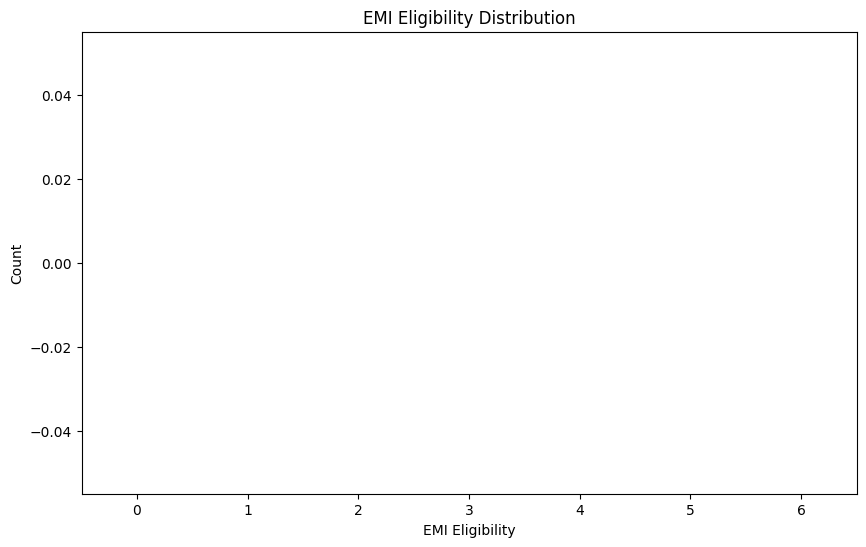

In [18]:
# 1. Analyze EMI eligibility distribution patterns
plt.figure(figsize=(10, 6))
sns.countplot(x='emi_eligibility', data=data)  # Replace 'emi_eligibility' with the actual column name
plt.title('EMI Eligibility Distribution')
plt.xlabel('EMI Eligibility')
plt.ylabel('Count')
plt.show()

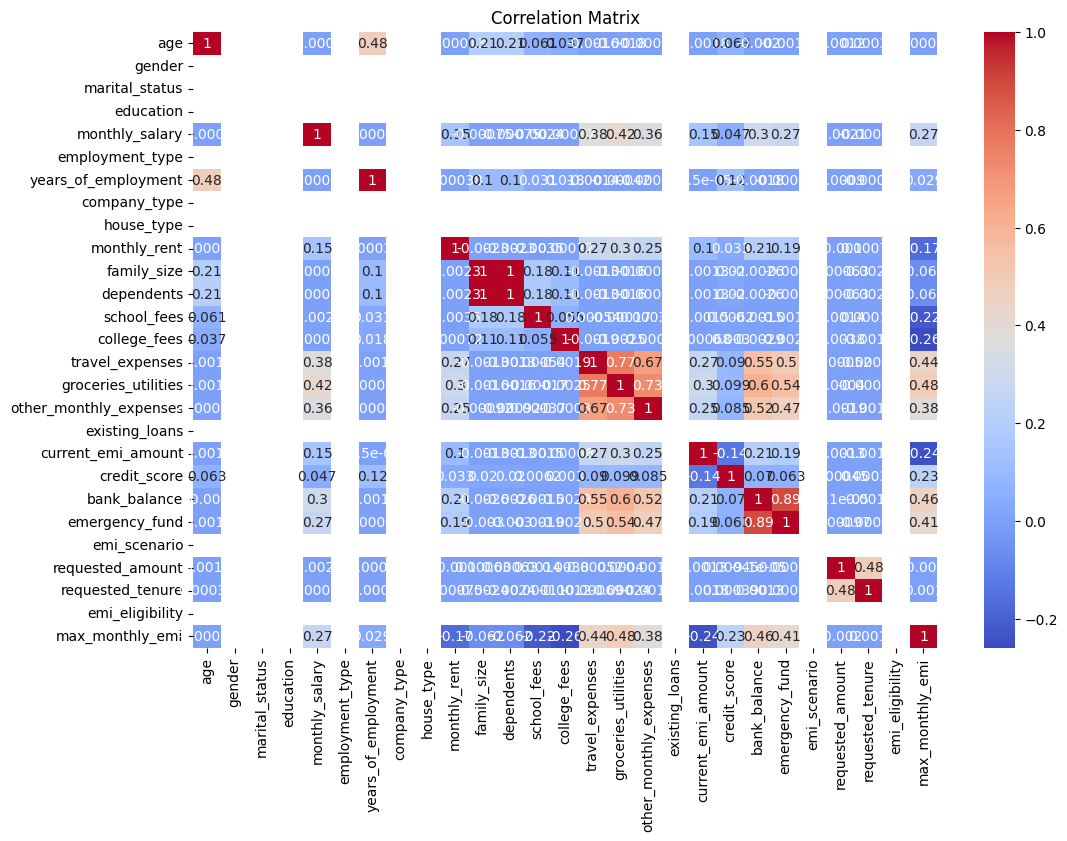

In [19]:
# 2. Study correlation between financial variables and loan approval rates
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

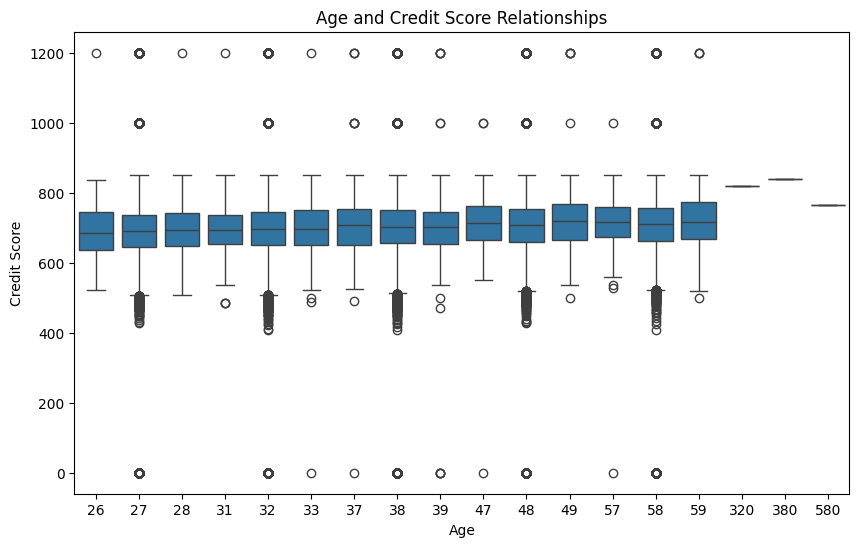

In [20]:
# Investigate demographic patterns and risk factor relationships
# Example using 'age' and 'credit_score' for analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='credit_score', data=data)  # Replace 'age' and 'credit_score' with actual column names
plt.title('Age and Credit Score Relationships')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

## Feature Engineering

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [22]:
# Function to clean numeric columns
def clean_numeric_column(column):
    # Remove any non-numeric characters except the first decimal point
    cleaned_column = column.str.replace(r'[^0-9.]', '', regex=True)
    # Remove any extra decimal points
    cleaned_column = cleaned_column.str.replace(r'\.(?=.*\.)', '', regex=True)
    return pd.to_numeric(cleaned_column, errors='coerce')

# Convert relevant columns to numeric, coercing errors to NaN
numeric_columns = ['existing_loans', 'monthly_salary', 'credit_score', 'monthly_rent',
                   'other_monthly_expenses', 'school_fees', 'college_fees', 'travel_expenses',
                   'groceries_utilities', 'max_monthly_emi', 'years_of_employment', 'age']

for col in numeric_columns:
    data[col] = clean_numeric_column(data[col].astype(str))

# 1. Create derived financial ratios
data['debt_to_income'] = data['existing_loans'] / data['monthly_salary']
data['expense_to_income'] = (data['monthly_rent'] + data['school_fees'] + data['college_fees'] +
                             data['travel_expenses'] + data['groceries_utilities'] + data['other_monthly_expenses']) / data['monthly_salary']
data['affordability_ratio'] = data['max_monthly_emi'] / data['monthly_salary']

# 2. Generate risk scoring features
data['employment_stability'] = data['years_of_employment'] / data['age']
data['credit_risk_score'] = data['credit_score'] / 850  # Assuming 850 is the max credit score

# 3. Apply categorical encoding and numerical feature scaling
categorical_features = ['gender', 'marital_status', 'education', 'employment_type', 'company_type', 'house_type']
numerical_features = ['monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size', 'dependents',
                      'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
                      'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund',
                      'requested_amount', 'requested_tenure', 'debt_to_income', 'expense_to_income', 'affordability_ratio',
                      'employment_stability', 'credit_risk_score']

# Define transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
data_transformed = pd.DataFrame(preprocessor.fit_transform(data))

# 4. Develop interaction features between numerical variables
data['income_credit_interaction'] = data['monthly_salary'] * data['credit_score']
data['loan_employment_interaction'] = data['existing_loans'] * data['years_of_employment']

# Display the first few rows of the transformed data
print(data.head())

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['existing_loans' 'debt_to_income']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


   age  gender  marital_status  education  monthly_salary  employment_type  \
0   38     NaN             NaN        NaN         82600.0              NaN   
1   38     NaN             NaN        NaN         21500.0              NaN   
2   38     NaN             NaN        NaN         86100.0              NaN   
3   58     NaN             NaN        NaN         66800.0              NaN   
4   48     NaN             NaN        NaN         57300.0              NaN   

   years_of_employment  company_type  house_type  monthly_rent  ...  \
0                  0.9           NaN         NaN       20000.0  ...   
1                  7.0           NaN         NaN           0.0  ...   
2                  5.8           NaN         NaN           0.0  ...   
3                  2.2           NaN         NaN           0.0  ...   
4                  3.4           NaN         NaN           0.0  ...   

   requested_tenure  emi_eligibility  max_monthly_emi  debt_to_income  \
0                15            

## Machine Learning Model Development

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

In [24]:
# Regression Models
X_train_reg = train_data.drop('max_monthly_emi', axis=1)
y_train_reg = train_data['max_monthly_emi']
X_val_reg = validation_data.drop('max_monthly_emi', axis=1)
y_val_reg = validation_data['max_monthly_emi']

In [25]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in training and validation data
X_train_reg = imputer.fit_transform(train_data.drop('max_monthly_emi', axis=1))
y_train_reg = train_data['max_monthly_emi']
X_val_reg = imputer.transform(validation_data.drop('max_monthly_emi', axis=1))
y_val_reg = validation_data['max_monthly_emi']

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
y_pred_linear = linear_model.predict(X_val_reg)

# Calculate RMSE manually
mse = mean_squared_error(y_val_reg, y_pred_linear)
rmse = np.sqrt(mse)

print("Linear Regression")
print(f"RMSE: {rmse}")
print(f"MAE: {mean_absolute_error(y_val_reg, y_pred_linear)}")
print(f"R-squared: {r2_score(y_val_reg, y_pred_linear)}\n")

Linear Regression
RMSE: 4298.987954640106
MAE: 3082.8573105885903
R-squared: 0.6903855640334395



C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender' 'marital_status' 'education' 'employment_type' 'company_type'
 'house_type' 'existing_loans' 'emi_scenario' 'emi_eligibility']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender' 'marital_status' 'education' 'employment_type' 'company_type'
 'house_type' 'existing_loans' 'emi_scenario' 'emi_eligibility']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [27]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_regressor.predict(X_val_reg)

# Calculate metrics for Random Forest
mse_rf = mean_squared_error(y_val_reg, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_val_reg, y_pred_rf)
r2_rf = r2_score(y_val_reg, y_pred_rf)

print("Random Forest Regressor")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R-squared: {r2_rf}\n")

Random Forest Regressor
RMSE: 1603.2565414038868
MAE: 885.206152992836
R-squared: 0.9569379415310757



In [55]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Assuming X_train, X_val, X_test are your datasets

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train XGBoost Regressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train_scaled, y_train_reg)

# Predict using the validation set
predictions = xgb_regressor.predict(X_val_scaled)

C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender' 'marital_status' 'education' 'employment_type' 'company_type'
 'house_type' 'existing_loans' 'emi_scenario' 'emi_eligibility']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender' 'marital_status' 'education' 'employment_type' 'company_type'
 'house_type' 'existing_loans' 'emi_scenario' 'emi_eligibility']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\Jantoin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['gender' 'marital_status' 'education' 'em

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics for XGBoost
mse_xgb = mean_squared_error(y_val_reg, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)  # Manually compute RMSE
mae_xgb = mean_absolute_error(y_val_reg, y_pred_xgb)
r2_xgb = r2_score(y_val_reg, y_pred_xgb)

print("XGBoost Regressor")
print(f"RMSE: {rmse_xgb}")
print(f"MAE: {mae_xgb}")
print(f"R-squared: {r2_xgb}\n")

XGBoost Regressor
RMSE: 1453.6066097779515
MAE: 888.4799905486032
R-squared: 0.9646016903946526



## Model Selection and MLflow Integration

In [48]:
# XGB Regression ML Flow Integration
import mlflow
import mlflow.sklearn

# Set up MLflow tracking
mlflow.set_tracking_uri("http://localhost:5000")  # Ensure MLflow server is running
mlflow.set_experiment("EMI Prediction Experiment")

# Log regression models and metrics
with mlflow.start_run(run_name="Regression Models"):
    for model in [xgb_regressor]:
        model_name = model.__class__.__name__
        mlflow.sklearn.log_model(model, model_name)
        mse = mean_squared_error(y_val_reg, model.predict(X_val_scaled))
        rmse = np.sqrt(mse)  # Manually compute RMSE
        mlflow.log_metric(f"{model_name}_rmse", rmse)
        mlflow.log_metric(f"{model_name}_mae", mean_absolute_error(y_val_reg, model.predict(X_val_scaled)))
        mlflow.log_metric(f"{model_name}_r_squared", r2_score(y_val_reg, model.predict(X_val_scaled)))

2025/10/27 15:56:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 15:57:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Regression Models at: http://localhost:5000/#/experiments/1/runs/a5fe50994f3f4f2fa65c971a95f69b61
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [49]:
# XGB Regression ML Flow Integration
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_scaled, y_train_reg)

# Predict using the validation set
y_pred_rf = rf_regressor.predict(X_val_scaled)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics for Random Forest
mse_rf = mean_squared_error(y_val_reg, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Manually compute RMSE
mae_rf = mean_absolute_error(y_val_reg, y_pred_rf)
r2_rf = r2_score(y_val_reg, y_pred_rf)

print("Random Forest Regressor")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R-squared: {r2_rf}\n")


Random Forest Regressor
RMSE: 1601.688847701365
MAE: 884.4422628026185
R-squared: 0.957022114102087



In [51]:
import mlflow
import mlflow.sklearn

# Set up MLflow tracking
mlflow.set_tracking_uri("http://localhost:5000")  # Ensure MLflow server is running
mlflow.set_experiment("EMI Prediction Experiment")

# Log regression models and metrics
with mlflow.start_run(run_name="Regression Models"):
    model_name = rf_regressor.__class__.__name__
    mlflow.sklearn.log_model(rf_regressor, model_name)
    mse = mean_squared_error(y_val_reg, y_pred_rf)
    rmse = np.sqrt(mse)  # Manually compute RMSE
    mlflow.log_metric(f"{model_name}_rmse", rmse)
    mlflow.log_metric(f"{model_name}_mae", mae_rf)
    mlflow.log_metric(f"{model_name}_r_squared", r2_rf)

2025/10/27 16:19:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 16:19:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Regression Models at: http://localhost:5000/#/experiments/1/runs/5c150ae264374283a472a0fa2576a0b3
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [53]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import mlflow
import mlflow.sklearn

# Assuming X_train_scaled, X_val_scaled, y_train_reg, y_val_reg are already defined

# Train Linear Regression Model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train_scaled, y_train_reg)

# Predict using the validation set
y_pred_lr = lr_regressor.predict(X_val_scaled)

# Calculate metrics for Linear Regression
mse_lr = mean_squared_error(y_val_reg, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # Manually compute RMSE
mae_lr = mean_absolute_error(y_val_reg, y_pred_lr)
r2_lr = r2_score(y_val_reg, y_pred_lr)

print("Linear Regression Model")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")
print(f"R-squared: {r2_lr}\n")

Linear Regression Model
RMSE: 4298.987954640109
MAE: 3082.857310588549
R-squared: 0.6903855640334393



In [54]:
# Set up MLflow tracking
mlflow.set_tracking_uri("http://localhost:5000")  # Ensure MLflow server is running
mlflow.set_experiment("EMI Prediction Experiment")

# Log regression models and metrics
with mlflow.start_run(run_name="Linear Regression Model"):
    model_name = lr_regressor.__class__.__name__
    mlflow.sklearn.log_model(lr_regressor, model_name)
    mse = mean_squared_error(y_val_reg, y_pred_lr)
    rmse = np.sqrt(mse)  # Manually compute RMSE
    mlflow.log_metric(f"{model_name}_rmse", rmse)
    mlflow.log_metric(f"{model_name}_mae", mae_lr)
    mlflow.log_metric(f"{model_name}_r_squared", r2_lr)

2025/10/27 16:23:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 16:23:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression Model at: http://localhost:5000/#/experiments/1/runs/c65fda91a5684da7a37b8acdb8bfc895
🧪 View experiment at: http://localhost:5000/#/experiments/1
